# [23. AR1 Processes](https://python.quantecon.org/ar1_processes.html)

## 23.1. Overview

In this lecture we are going to study a very simple class of stochastic models called AR(1) processes.

These simple models are used again and again in economic research to represent the dynamics of series such as

* labor income

* dividends

* productivity, etc.

AR(1) processes can take negative values but are easily converted into positive processes when necessary by a transformation such as exponentiation.

We are going to study AR(1) processes partly because they are useful and partly because they help us understand important concepts.

Let’s start with some imports:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 12)  #set default figure size

## 23.2. The AR(1) Model

The AR(1) model (autoregressive model of order 1) takes the form

$$X_{t+1} = aX_t + b + cW_{t+1}$$ 
$$(23.1)$$

where a, b, c are scalar-valued parameters.

This law of motion generates a time series {$X_t$} as soon as we specify an intitial condition $X_0$

This is called the state process and the state space is $\mathbb{R}$.

To make things even simpler, we will assume that 

* the process {$W_t$} is IID and standard normal 

* the initial condition $X_0$ is drawn from the normal distribution $N(\mu_0, \nu_0)$ and

* the initial condition $X_0$ is independent of {$W_t$}

### 23.2.2. Moving Average Representation

Iterating backwards from time $t$, we obtain

$$X_t = aX_{t-1} + b + cW_t = a^2X_{t-2} + ab + acW_{t-1} + b + cW_t = . . . $$

If we work all the way back to time zero, we get

$$X_t = a^tX_0 + b \sum_{j=0}^{t-1}{a^j} + c \sum_{j=0}^{t-1}{a^jW_{t-j}}$$
$$(23.2)$$

Equation (above) shows that is a well defined random variable, the value of which depends on

* the parameters

* the initial condition $X_0$ and

* the shocks $W_1, . . ., W_t$ from time $t=1$ to the present.

Throughout, the symbol $\psi_t$ will be used to refer to the density of this random variable $X_t$

### 23.2.2. Distribution Dynamics

One of the nice things about this model is that it’s so easy to trace out the sequence of distributions {$\psi_t$} corresponding to the time series {$X_t$}.

To see this, we first note that $X_t$ is normally distributed for each $t$.

This is immediate from (23.2), since linear combinations of independent normal random variables are normal.

Given that $X_t$ is normally distributed, we will know the full distribution $\psi_t$ if we can pin down its first two moments. 

Let $\mu_t$ and $\nu_t$ denote the mean and variance of $X_t$ respectively.

We can pin down these values from (23.2) or we can use the following recursive expressions:

$$\mu_{t+1}=a\mu_t + b$$
$$\nu_{t+1} = a^2\nu_t + c^2$$
$$(23.3)$$

These expressions are obtained from (23.1) by taking, respectively, the expectation and variance of both sides of the equality.

In calculating the second expression, we are using the fact that $X_t$ and $W_{t+1}$ are independent.

(This follows from our assumptions and (23.2).)

Given the dynamics in (23.2) and initial conditions $\mu_0,\nu_0$, we obtain $\mu_t,\nu_t$, and hence

$$\psi_t = N(\mu_t,\nu_t)$$

The following code uses these facts to track the sequence of marginal distributions {$\psi_t$}.

The parameters are

In [2]:
a, b, c = 0.9, 0, 0.5

mu, v = -3.0, 0.6  # initial conditions mu_0, v_0

Here’s the sequence of distributions:

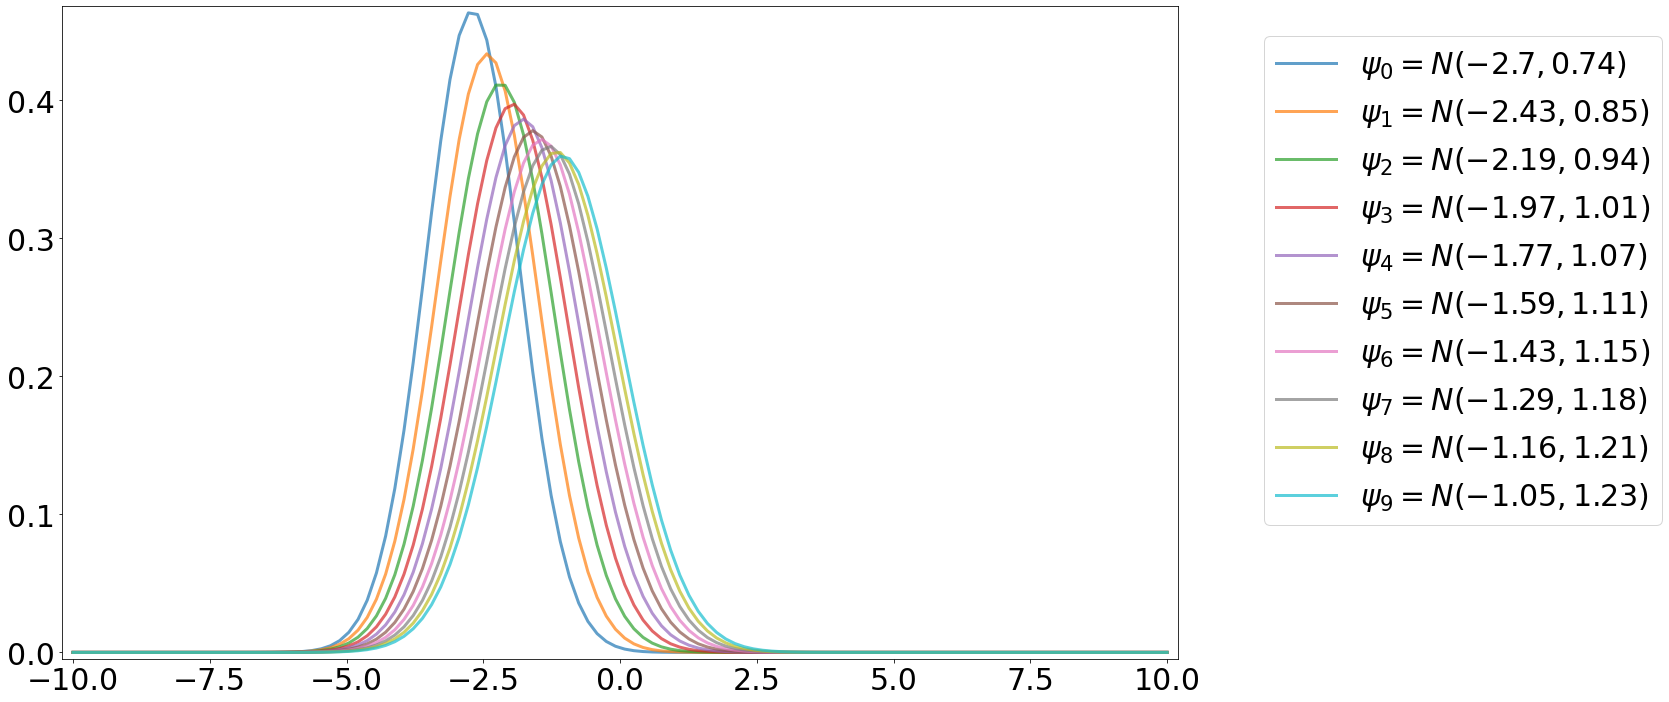

In [3]:
from scipy.stats import norm
plt.rcParams['axes.xmargin'] = .01
plt.rcParams['axes.ymargin'] = .01
plt.rcParams["font.size"] = 30
sim_length = 10
grid = np.linspace(-10, 10, 120)

fig, ax = plt.subplots()

for t in range(sim_length):
    mu = a * mu + b
    v = a**2 * v + c**2
    ax.plot(grid, norm.pdf(grid, loc=mu, scale=np.sqrt(v)),
            linewidth = 3,
            label=f"$\psi_{t}=N(" + str(round(mu,2)) + "," + str(round(v,2)) + ")$",
            alpha=0.7)

ax.legend(bbox_to_anchor=[1.05,1],loc=2,ncol = 1,borderaxespad=1)

plt.show()

## 23.3. Stationarity and Asymptotic Stability

Notice that, in the figure above, the sequence {$\psi_t$} seems to be converging to a limiting distribution.

This is even clearer if we project forward further into the future:

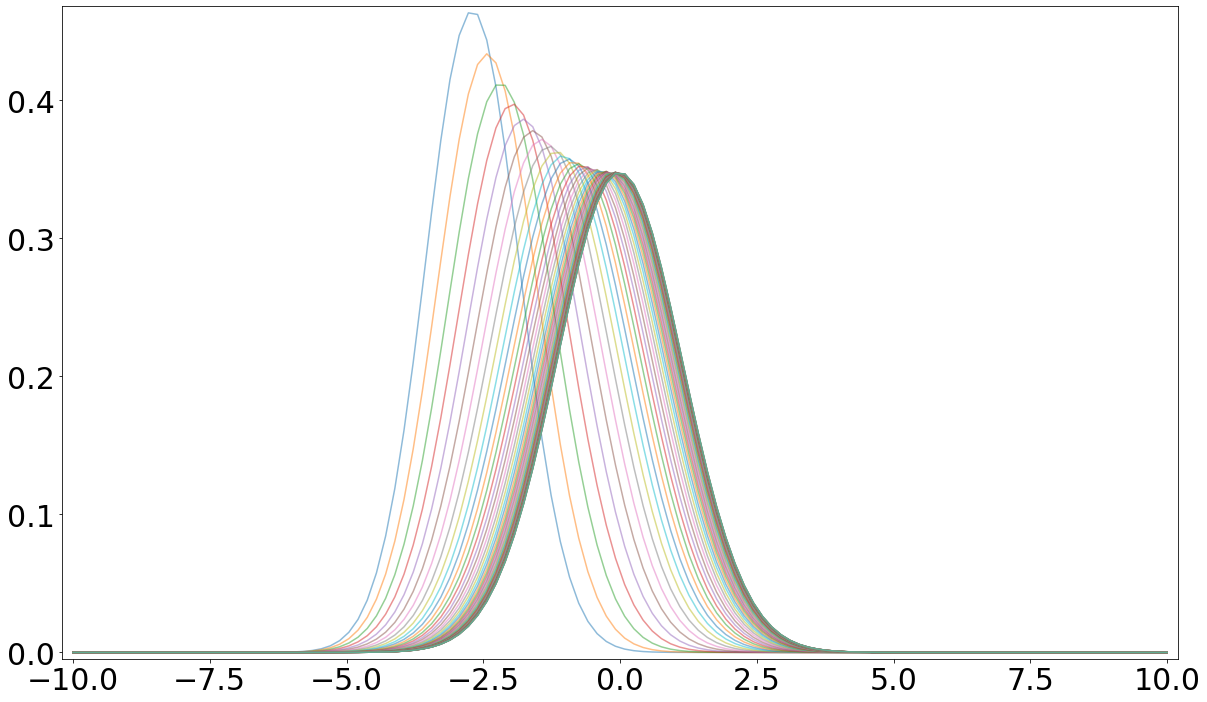

In [4]:
def plot_density_seq(ax, mu_0=-3.0, v_0=0.6,
                     a= 0.9, b = 0 , c = 0.5,
                     sim_length=60):
    mu, v = mu_0, v_0
    for t in range(sim_length):
        mu = a * mu + b
        v = a**2 * v + c**2
        ax.plot(grid,
                norm.pdf(grid, loc=mu, scale=np.sqrt(v)),
                alpha=0.5)

fig, ax = plt.subplots()
plot_density_seq(ax)
plt.show()

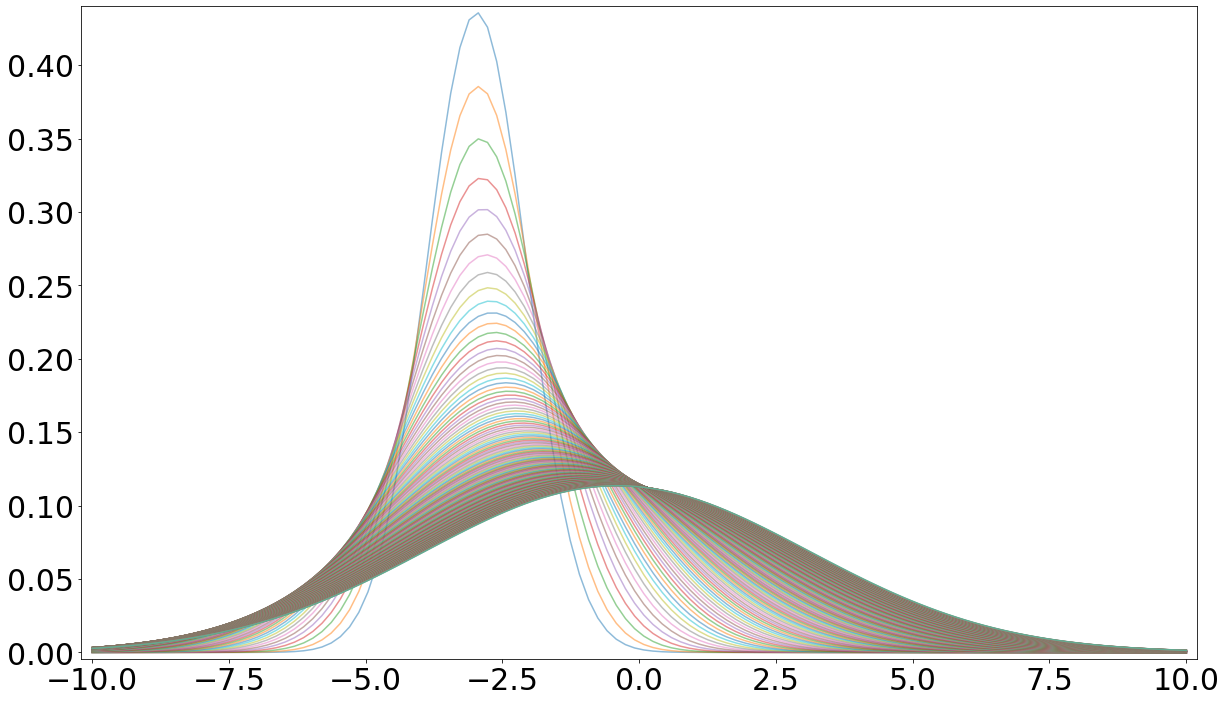

In [5]:
fig, ax = plt.subplots()
plot_density_seq(ax, a = .99, sim_length = 200)
plt.show()

Moreover, the limit does not depend on the initial condition.

For example, this alternative density sequence also converges to the same limit.

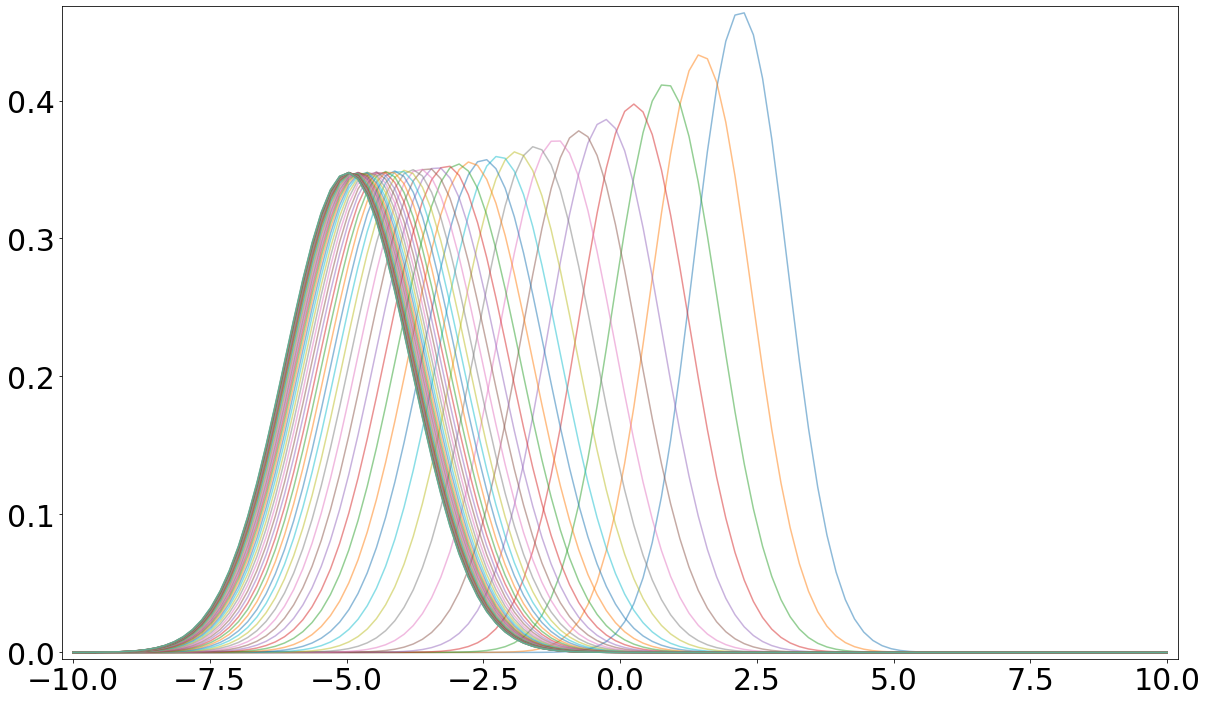

In [6]:
fig, ax = plt.subplots()
plot_density_seq(ax, mu_0=3.0, b = -.5)
plt.show()

In fact it’s easy to show that such convergence will occur, regardless of the initial condition, whenever $|a|<1$.

To see this, we just have to look at the dynamics of the first two moments, as given in (23.3).

When $|a|<1$, these sequences converge to the respective limits

$$\mu^* := \frac{b}{1-a}$$
$$\nu^* = \frac{c^2}{1-a^2}$$
$$(23.4)$$

Hence

$$\psi_t \rightarrow\psi^*=N(\mu^*,\nu^*)$$
<center>as</center>
$$t \rightarrow \infty$$
$$(23.5)$$

We can confirm this is valid for the sequence above using the following code.

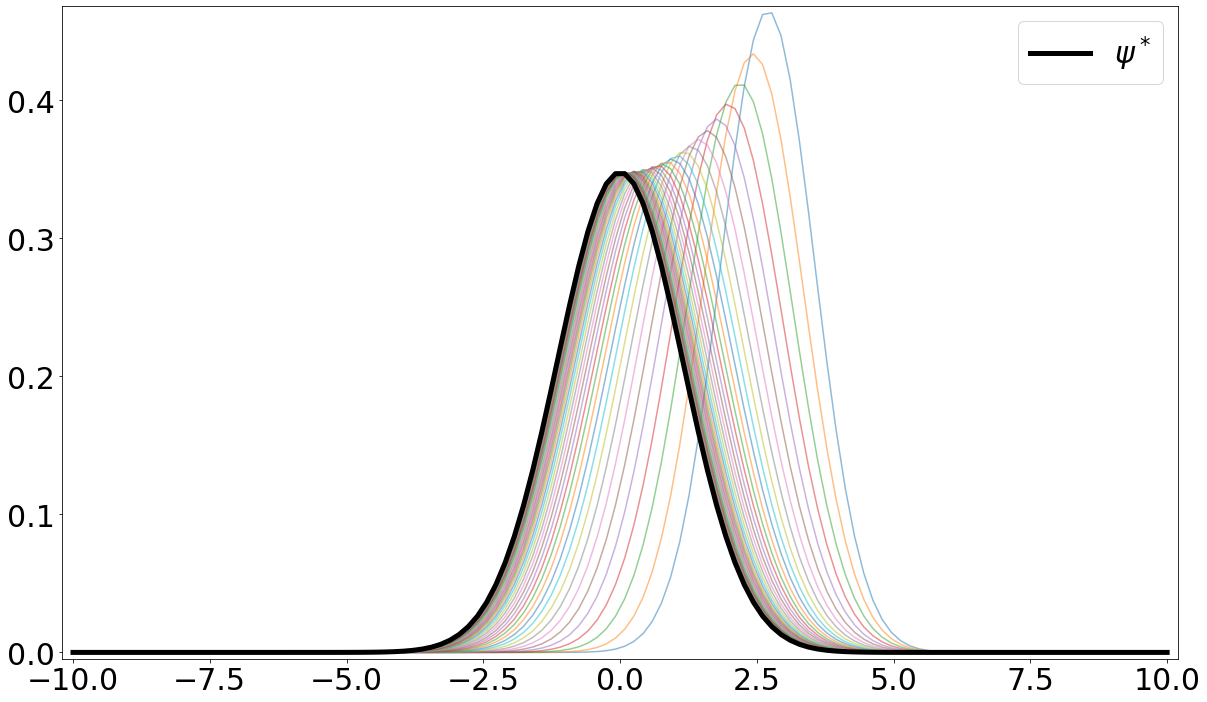

In [8]:
fig, ax = plt.subplots()
plot_density_seq(ax, mu_0=3.0)

mu_star = b / (1 - a)
std_star = np.sqrt(c**2 / (1 - a**2))  # square root of v_star
psi_star = norm.pdf(grid, loc=mu_star, scale=std_star)
ax.plot(grid, psi_star, 'k-', lw=5, label="$\psi^*$")
ax.legend()

plt.show()

As claimed, the sequence {$\psi_t$} converges to $\psi^*$.

### 23.3.1. Stationary Distributions

A stationary distribution is a distribution that is a fixed point of the update rule for distributions.

In other words, if $\psi_t$ is stationary, then $\psi_{t+j} = \psi_t$ for all $j$ in $\mathbb{N}$

A different way to put this, specialized to the current setting, is as follows: a density $\psi$ on $\mathbb{R}$ is stationary for the AR(1) process if

$$X_t \sim \psi \rightarrow aX_t + b + cW_{t+1} \sim \psi$$

